# 项目一的实验结果

In [1]:
from matplotlib import pyplot as plt
import numpy as np


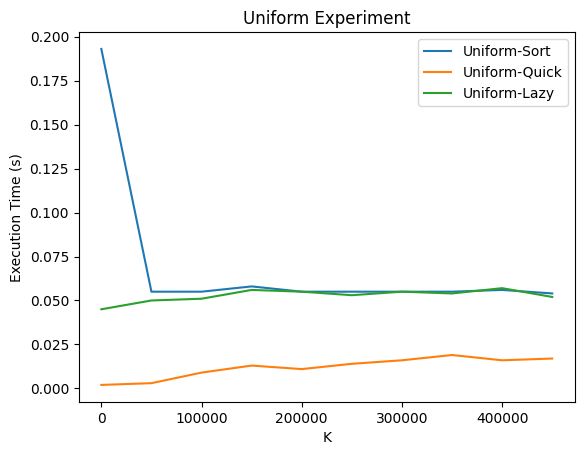

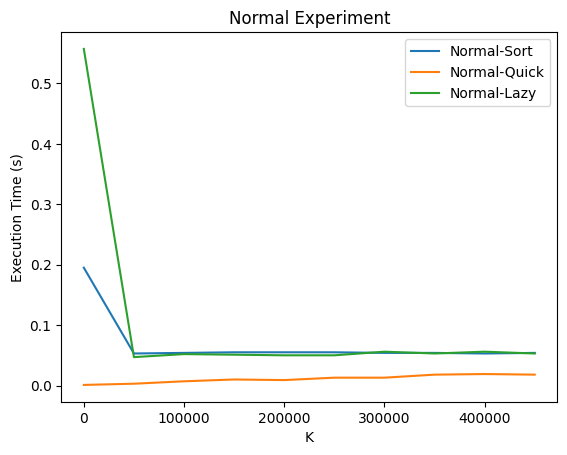

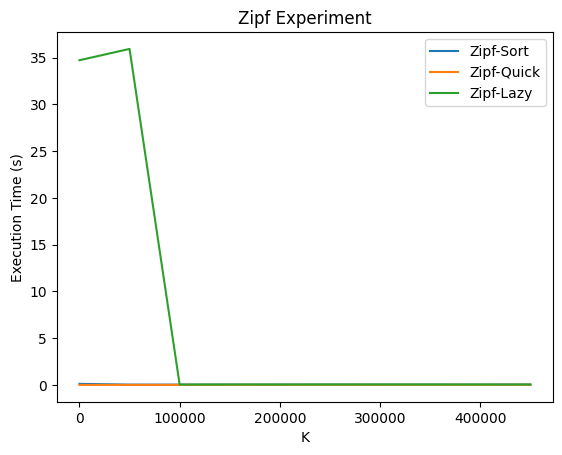

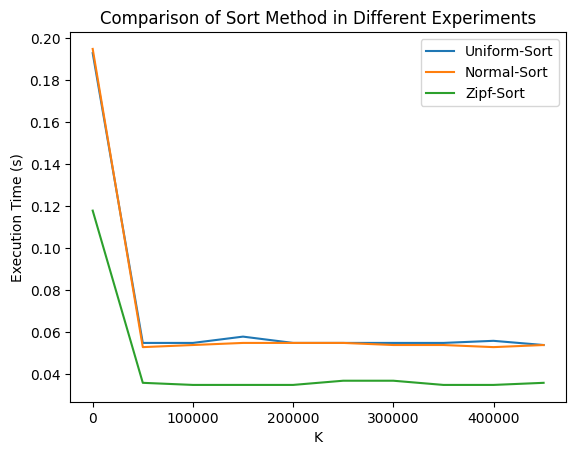

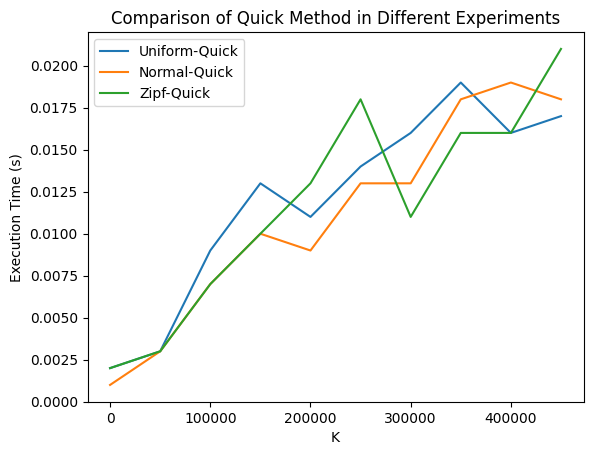

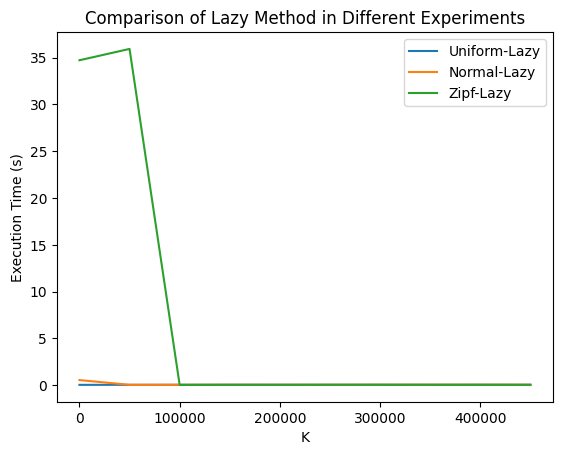

In [2]:
import matplotlib.pyplot as plt

# 从文件中读取数据
with open('experiments.txt', 'r') as f:
    data = f.read().splitlines()

# 解析数据
uniform_sort_data = []
uniform_quick_data = []
uniform_lazy_data = []
normal_sort_data = []
normal_quick_data = []
normal_lazy_data = []
zipf_sort_data = []
zipf_quick_data = []
zipf_lazy_data = []

current_experiment = None
for line in data:
    if 'Uniform time' in line:
        current_experiment = 'uniform'
    elif 'Normal time' in line:
        current_experiment = 'normal'
    elif 'Zipf time' in line:
        current_experiment = 'zipf'
    elif 'sort' in line:
        current_algorithm = 'sort'
    elif 'quick' in line:
        current_algorithm = 'quick'
    elif 'lazy' in line:
        current_algorithm = 'lazy'
    else:
        size, time = line.split()
        size = int(size)
        time = float(time)
        if current_experiment == 'uniform':
            if current_algorithm == 'sort':
                uniform_sort_data.append((size, time))
            elif current_algorithm == 'quick':
                uniform_quick_data.append((size, time))
            elif current_algorithm == 'lazy':
                uniform_lazy_data.append((size, time))
        elif current_experiment == 'normal':
            if current_algorithm == 'sort':
                normal_sort_data.append((size, time))
            elif current_algorithm == 'quick':
                normal_quick_data.append((size, time))
            elif current_algorithm == 'lazy':
                normal_lazy_data.append((size, time))
        elif current_experiment == 'zipf':
            if current_algorithm == 'sort':
                zipf_sort_data.append((size, time))
            elif current_algorithm == 'quick':
                zipf_quick_data.append((size, time))
            elif current_algorithm == 'lazy':
                zipf_lazy_data.append((size, time))

# 绘制 Uniform 实验图像
plt.plot([x[0] for x in uniform_sort_data], [x[1] for x in uniform_sort_data], label='Uniform-Sort')
plt.plot([x[0] for x in uniform_quick_data], [x[1] for x in uniform_quick_data], label='Uniform-Quick')
plt.plot([x[0] for x in uniform_lazy_data], [x[1] for x in uniform_lazy_data], label='Uniform-Lazy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Execution Time (s)')
plt.title('Uniform Experiment')
plt.show()

# 绘制 Normal 实验图像
plt.plot([x[0] for x in normal_sort_data], [x[1] for x in normal_sort_data], label='Normal-Sort')
plt.plot([x[0] for x in normal_quick_data], [x[1] for x in normal_quick_data], label='Normal-Quick')
plt.plot([x[0] for x in normal_lazy_data], [x[1] for x in normal_lazy_data], label='Normal-Lazy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Execution Time (s)')
plt.title('Normal Experiment')
plt.show()

# 绘制 Zipf 实验图像
plt.plot([x[0] for x in zipf_sort_data], [x[1] for x in zipf_sort_data], label='Zipf-Sort')
plt.plot([x[0] for x in zipf_quick_data], [x[1] for x in zipf_quick_data],label="Zipf-Quick")
plt.plot([x[0] for x in zipf_lazy_data],[x[1] for x in zipf_lazy_data],label='Zipf-Lazy')
plt.legend()
plt.xlabel("K")
plt.ylabel('Execution Time (s)')
plt.title("Zipf Experiment")
plt.show()


# 绘制子图1，比较 Sort 方法在不同实验条件下的分布图
fig, ax1 = plt.subplots()
ax1.plot([x[0] for x in uniform_sort_data], [x[1] for x in uniform_sort_data], label='Uniform-Sort')
ax1.plot([x[0] for x in normal_sort_data], [x[1] for x in normal_sort_data], label='Normal-Sort')
ax1.plot([x[0] for x in zipf_sort_data], [x[1] for x in zipf_sort_data], label='Zipf-Sort')
ax1.legend()
ax1.set_xlabel("K")
ax1.set_ylabel('Execution Time (s)')
ax1.set_title('Comparison of Sort Method in Different Experiments')

# 绘制子图2，比较 Quick 方法在不同实验条件下的分布图
fig, ax2 = plt.subplots()
ax2.plot([x[0] for x in uniform_quick_data], [x[1] for x in uniform_quick_data], label='Uniform-Quick')
ax2.plot([x[0] for x in normal_quick_data], [x[1] for x in normal_quick_data], label='Normal-Quick')
ax2.plot([x[0] for x in zipf_quick_data], [x[1] for x in zipf_quick_data], label='Zipf-Quick')
ax2.legend()
ax2.set_xlabel("K")
ax2.set_ylabel('Execution Time (s)')
ax2.set_title('Comparison of Quick Method in Different Experiments')

# 绘制子图3，比较 Lazy 方法在不同实验条件下的分布图
fig, ax3 = plt.subplots()
ax3.plot([x[0] for x in uniform_lazy_data], [x[1] for x in uniform_lazy_data], label='Uniform-Lazy')
ax3.plot([x[0] for x in normal_lazy_data], [x[1] for x in normal_lazy_data], label='Normal-Lazy')
ax3.plot([x[0] for x in zipf_lazy_data], [x[1] for x in zipf_lazy_data], label='Zipf-Lazy')
ax3.legend()
ax3.set_xlabel("K")
ax3.set_ylabel('Execution Time (s)')
ax3.set_title('Comparison of Lazy Method in Different Experiments')

plt.show()

# 项目二的结果

我发现当数据重复率达到10%时候，origin_quicksort就会栈溢出,最初使用stack_depth检测栈的深度，发现这样会误伤其他的一些函数，后面使用运行时间来检测，origin_quicksort因为会爆栈，所以运行时间即便是20倍也不会有任何输出，根据这个标准，可以使用时间来进行检测。

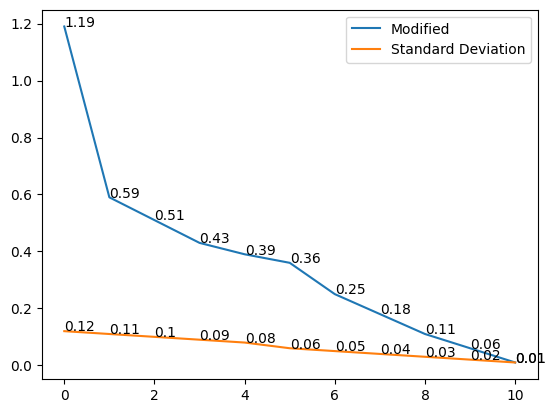

In [9]:
import matplotlib.pyplot as plt
# 读取文件
with open('experiment_quicksort.txt', 'r') as f:
    data = f.readlines()

# 提取原始值、修改值和标准差
original_values = []
modified_values = []
std_values = []

for line in data:
    if line.startswith('origin'):
        original_values.append(float(line.split(': ')[1][-6:]))
    elif line.startswith('modified'):
        modified_values.append(float(line.split(': ')[1]))
    elif line.startswith('std'):
        std_values.append(float(line.split(': ')[1]))

# 绘制折线图
#plt.plot(original_values, label='Original')
plt.plot(modified_values, label='Modified')
plt.plot(std_values, label='Standard Deviation')
plt.legend()
# 在每个点上添加文本标签
# for i, value in enumerate(original_values):
#     plt.text(i, value, str(value))
for i, value in enumerate(modified_values):
    plt.text(i, value, str(value))
for i, value in enumerate(std_values):
    plt.text(i, value, str(value))

plt.show()